In [3]:
import pandas as pd
df = pd.read_csv('Credit Card Defaulter Prediction.csv')
df['default '] = df['default '].map({'Y': 1, 'N': 0})
df['SEX'] = df['SEX'].map({'F': 0, 'M': 1})
df['EDUCATION'] = df['EDUCATION'].astype('category').cat.codes
df['MARRIAGE'] = df['MARRIAGE'].astype('category').cat.codes



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['ID', 'default '], axis=1)
y = df['default ']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)



In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4401  272]
 [ 846  481]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



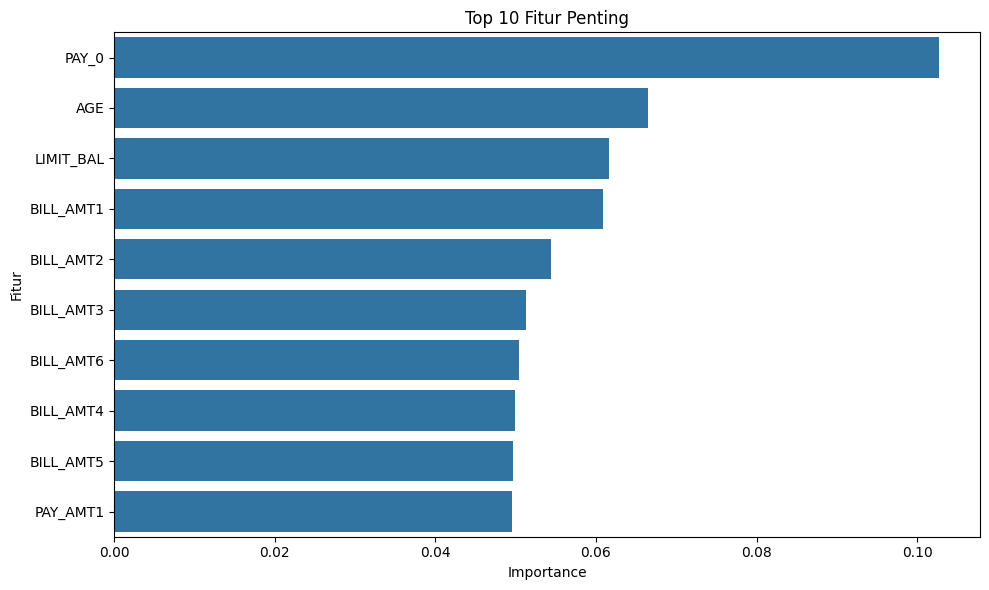

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
columns = X.columns
feat_df = pd.DataFrame({'Fitur': columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Fitur', data=feat_df.head(10))
plt.title('Top 10 Fitur Penting')
plt.tight_layout()
plt.show()


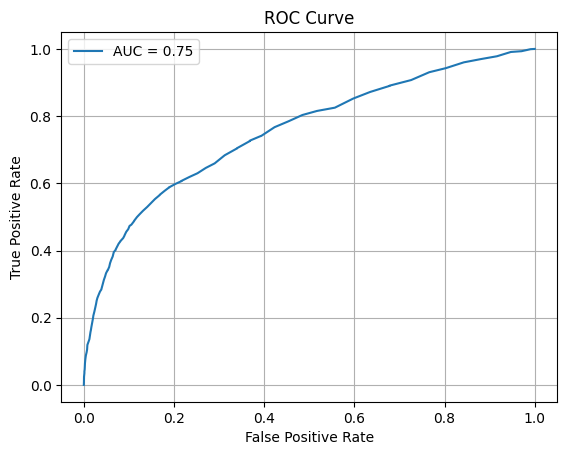

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
